In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tf.random.set_seed(42)

In [2]:
data = pd.read_csv("/content/Restaurant_Reviews.tsv",sep='\t')

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.rename(columns={'Review': 'review', 'Liked': 'label'}, inplace=True)


In [5]:
data.head()

,review,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.shape

(1000, 2)

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

data['review'] = data['review'].apply(preprocess_text)

In [8]:
data.head()

,review,label
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


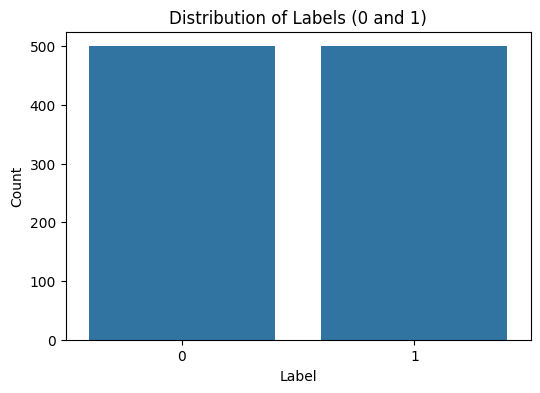

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['label'])
plt.title('Distribution of Labels (0 and 1)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [10]:
texts = data['review']
labels = data['label']

In [11]:
vocab_size = 1000
embedding_dim = 50

In [12]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="OOV")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [13]:
tokenizer.index_word

{1: 'OOV',
 2: 'the',
 3: 'and',
 4: 'i',
 5: 'was',
 6: 'a',
 7: 'to',
 8: 'is',
 9: 'this',
 10: 'it',
 11: 'of',
 12: 'food',
 13: 'not',
 14: 'for',
 15: 'in',
 16: 'place',
 17: 'good',
 18: 'service',
 19: 'we',
 20: 'very',
 21: 'my',
 22: 'with',
 23: 'great',
 24: 'had',
 25: 'that',
 26: 'be',
 27: 'so',
 28: 'were',
 29: 'are',
 30: 'but',
 31: 'have',
 32: 'back',
 33: 'you',
 34: 'they',
 35: 'here',
 36: 'on',
 37: 'at',
 38: 'like',
 39: 'go',
 40: 'all',
 41: 'time',
 42: 'our',
 43: 'will',
 44: 'as',
 45: 'really',
 46: 'just',
 47: 'there',
 48: 'an',
 49: 'their',
 50: 'if',
 51: 'best',
 52: 'would',
 53: 'ever',
 54: 'dont',
 55: 'also',
 56: 'only',
 57: 'never',
 58: 'friendly',
 59: 'one',
 60: 'up',
 61: 'no',
 62: 'your',
 63: 'restaurant',
 64: 'out',
 65: 'nice',
 66: 'again',
 67: 'from',
 68: 'been',
 69: 'what',
 70: 'amazing',
 71: 'delicious',
 72: 'did',
 73: 'by',
 74: 'vegas',
 75: 'which',
 76: 'im',
 77: 'some',
 78: 'came',
 79: 'its',
 80: 'when

In [14]:
len(tokenizer.word_counts)

2050

In [15]:
max_len = max(len(seq) for seq in sequences)
max_len

32

In [16]:
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='pre')
y = np.array(labels)

In [17]:
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X_train.shape, X_test.shape

((800, 32), (200, 32))

In [19]:
X_train_reshaped = X_train[..., np.newaxis]
X_test_reshaped = X_test[..., np.newaxis]

In [20]:
model = Sequential([
   Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(units=64, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
history = model.fit(
    X_train, y_train,
    epochs=8, batch_size=10,
    validation_split=0.3
)

Epoch 1/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5292 - loss: 0.6892 - val_accuracy: 0.5375 - val_loss: 0.6963
Epoch 2/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8138 - loss: 0.5004 - val_accuracy: 0.6000 - val_loss: 0.7410
Epoch 3/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9273 - loss: 0.2581 - val_accuracy: 0.6542 - val_loss: 0.7761
Epoch 4/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9397 - loss: 0.1690 - val_accuracy: 0.6000 - val_loss: 0.8791
Epoch 5/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9855 - loss: 0.0745 - val_accuracy: 0.6125 - val_loss: 1.0228
Epoch 6/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9846 - loss: 0.0583 - val_accuracy: 0.6000 - val_loss: 1.1122
Epoch 7/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9799 - loss: 0.0592 - val_accuracy: 0.6208 - val_loss: 1.1402
Epoch 8/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9937 - loss: 0.0286 - val_accuracy: 0.6042 - val_loss:

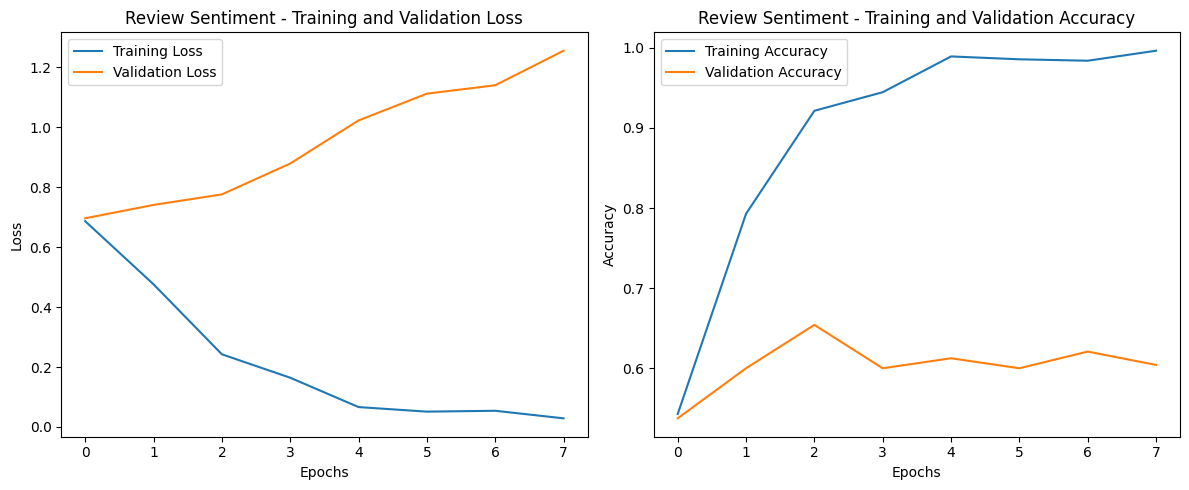

In [22]:
def plot_training_metrics(history, title):
    """
    Plots the training and validation loss and accuracy for a given model's history.

    Parameters:
    history: The History object returned by model.fit().
    model_name: Name of the model for title display.
    """
    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_metrics(history, 'Review Sentiment')


In [23]:
test_accuracy = model.evaluate(X_test, y_test)[1]
print("Model with Embedding Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5326 - loss: 1.2683  
Model with Embedding Test Accuracy: 0.550000011920929


In [24]:
model = Sequential([
    SimpleRNN(units=64, activation='tanh', input_shape=(max_len, 1)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5011 - loss: 0.7100 - val_accuracy: 0.5333 - val_loss: 0.7166
Epoch 2/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5402 - loss: 0.6882 - val_accuracy: 0.4875 - val_loss: 0.7190
Epoch 3/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5639 - loss: 0.6913 - val_accuracy: 0.5250 - val_loss: 0.7041
Epoch 4/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5687 - loss: 0.6829 - val_accuracy: 0.5250 - val_loss: 0.7121
Epoch 5/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5519 - loss: 0.6837 - val_accuracy: 0.5292 - val_loss: 0.7124
Epoch 6/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5423 - loss: 0.6822 - val_accuracy: 0.5333 - val_loss: 0.7158
Epoch 7/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5681 - loss: 0.6793 - val_accuracy: 0.5125 - val_loss: 0.7189
Epoch 8/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5877 - loss: 0.6785 - val_accuracy: 0.5167 - val_loss: 0.72

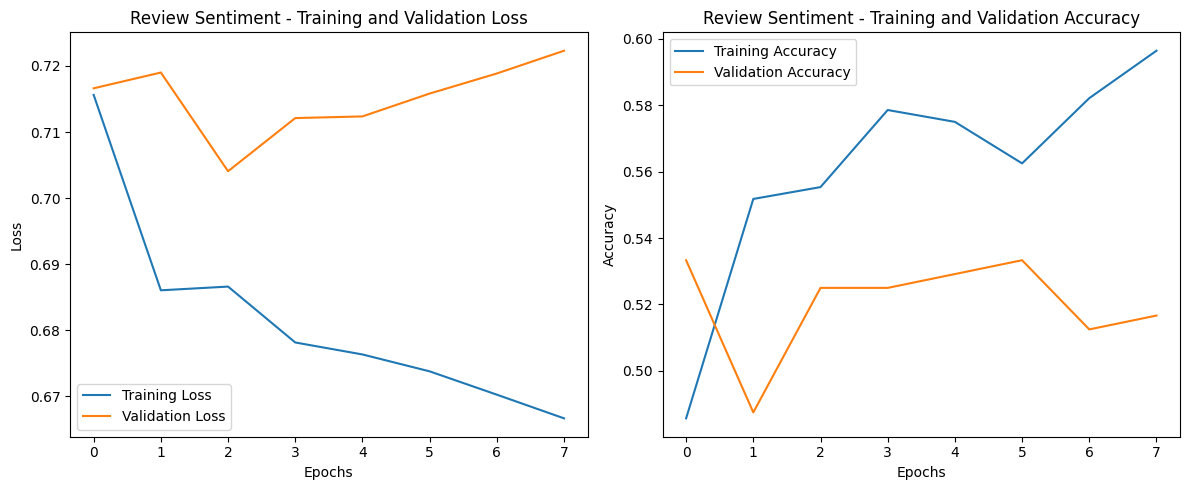

In [25]:
X_train_reshaped = X_train[..., np.newaxis]
X_test_reshaped = X_test[..., np.newaxis]

history_without_embedding = model.fit(
    X_train_reshaped, y_train,
    epochs=8, batch_size=10,
    validation_split=0.3
)
plot_training_metrics(history_without_embedding, 'Review Sentiment')

In [26]:
test_accuracy = model.evaluate(X_test_reshaped, y_test)[1]
print("Model without Embedding Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4866 - loss: 0.7332  
Model without Embedding Test Accuracy: 0.4749999940395355


In [27]:
X = pad_sequences(sequences, maxlen=20, padding='post', truncating='post')
y = np.array(labels)

X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
   Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(units=64, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Epoch 1/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4617 - loss: 0.7051 - val_accuracy: 0.5917 - val_loss: 0.6726
Epoch 2/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8107 - loss: 0.5228 - val_accuracy: 0.6333 - val_loss: 0.7059
Epoch 3/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8691 - loss: 0.3170 - val_accuracy: 0.5833 - val_loss: 0.8793
Epoch 4/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9298 - loss: 0.2136 - val_accuracy: 0.5917 - val_loss: 0.8825
Epoch 5/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9643 - loss: 0.1628 - val_accuracy: 0.6500 - val_loss: 0.9403
Epoch 6/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9274 - loss: 0.2017 - val_accuracy: 0.6417 - val_loss: 1.0099
Epoch 7/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9028 - loss: 0.2470 - val_accuracy: 0.6458 - val_loss: 1.0088
Epoch 8/8
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9834 - loss: 0.0939 - val_accuracy: 0.5167 - val_loss: 

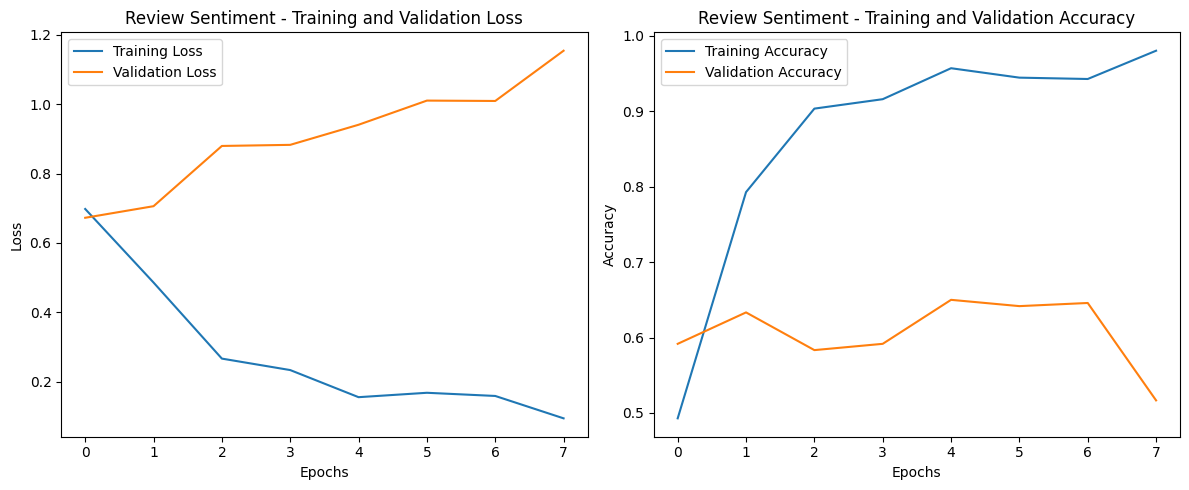

In [28]:
history = model.fit(
    X_train, y_train,
    epochs=8, batch_size=10,
    validation_split=0.3
    )

plot_training_metrics(history, 'Review Sentiment')

In [29]:
test_accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5720 - loss: 1.1052  
Test Accuracy: 0.5799999833106995
